# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [5]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [7]:
# Load the dataset
df=pd.read_csv("Employee_data.csv")

In [8]:
# Check the first few entries
df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [9]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [10]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [12]:
# Check the summary of the dataset
df.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [13]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [14]:
# Check the number of missing values in each column
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [15]:
# Check the percentage of missing values in each column
df.isnull().sum()/len(df)*100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [16]:
# Handle the missing value rows in the column
df["Distance from Home"]=df["Distance from Home"].fillna(df["Distance from Home"].median())
df["Company Tenure (In Months)"]=df["Company Tenure (In Months)"].fillna(df["Company Tenure (In Months)"].median())


2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [17]:
# Check the percentage of remaining data after missing values are removed
original_data=df.shape[0]
missing_data=df[df.isnull().any(axis=1)].shape[0]
total_data=original_data-missing_data
remaining_percent=(total_data/original_data)*100
remaining_percent

100.0

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [21]:
# Write a function to display the categorical columns with their unique values and check for redundant values
cat_cols=df.select_dtypes(include=["object"]).columns

In [22]:
# Check the data
cat_cols

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [24]:
# Drop redundant columns which are not required for modelling
for col in cat_cols:
    if df[col].nunique()==1:
        df.drop(columns=col,inplace=True)
cat_cols

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [25]:
# Check first few rows of data
df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [26]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [27]:
# Put all the feature variables in X
X=df.drop(["Attrition"],axis=1)

# Put the target variable in y
y=df["Attrition"]

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [217]:
# Split the data into 70% train data and 30% validation data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [29]:
# Select numerical columns
num_cols=X_train.select_dtypes(include=["int64","float64"]).columns
num_cols

Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

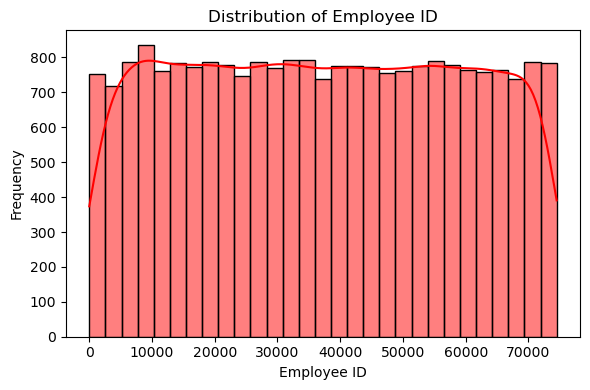

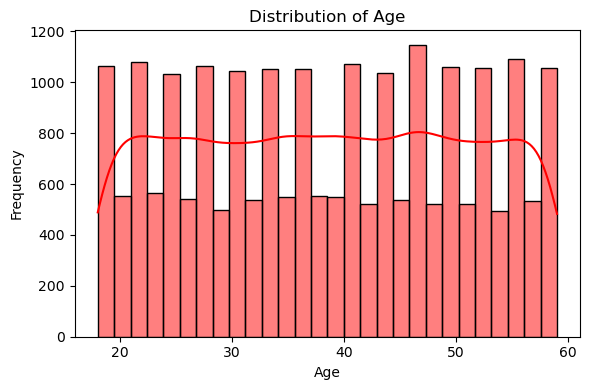

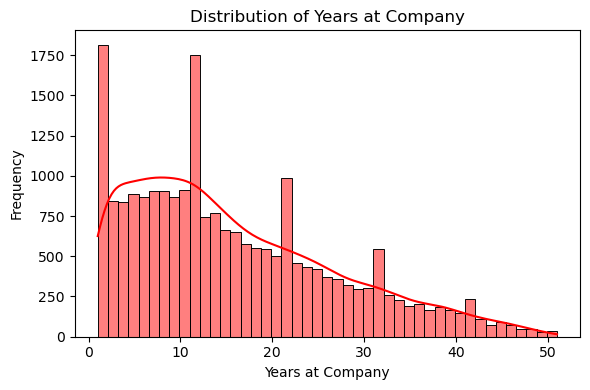

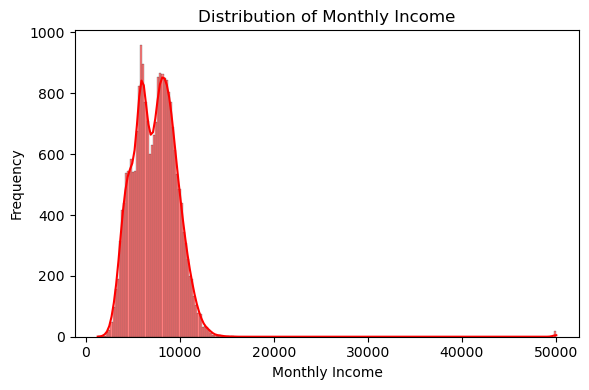

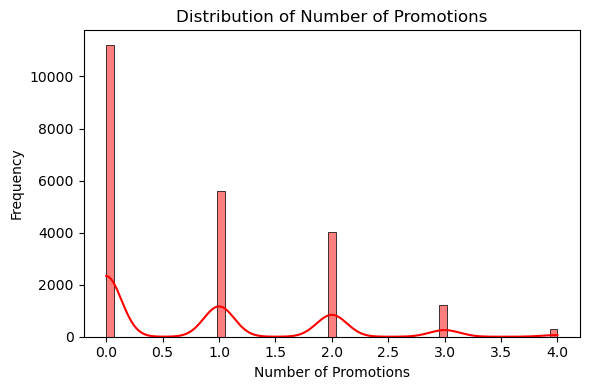

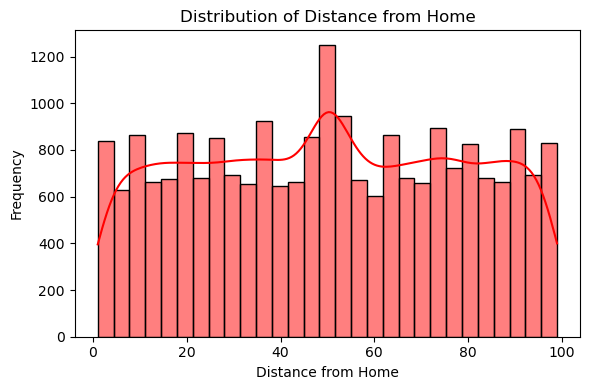

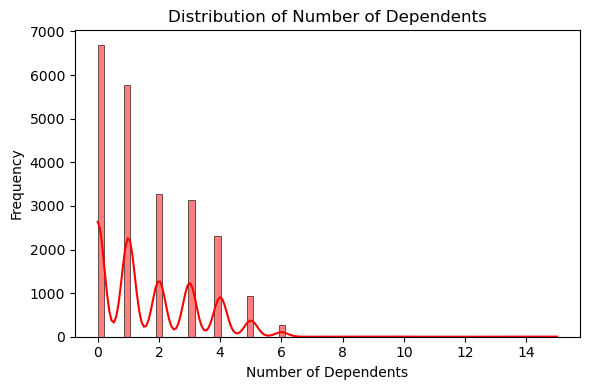

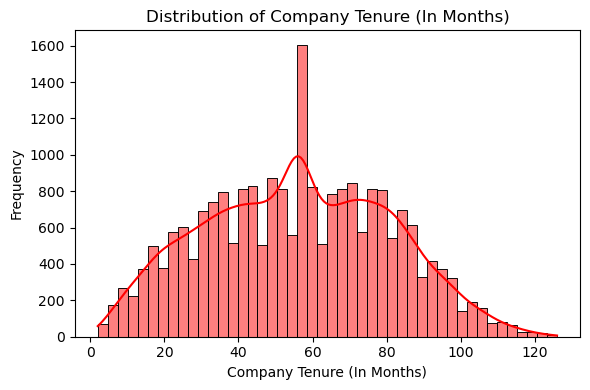

In [35]:
# Plot all the numerical columns to understand their distribution
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=X_train,x=col,kde=True,color="red")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
               

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

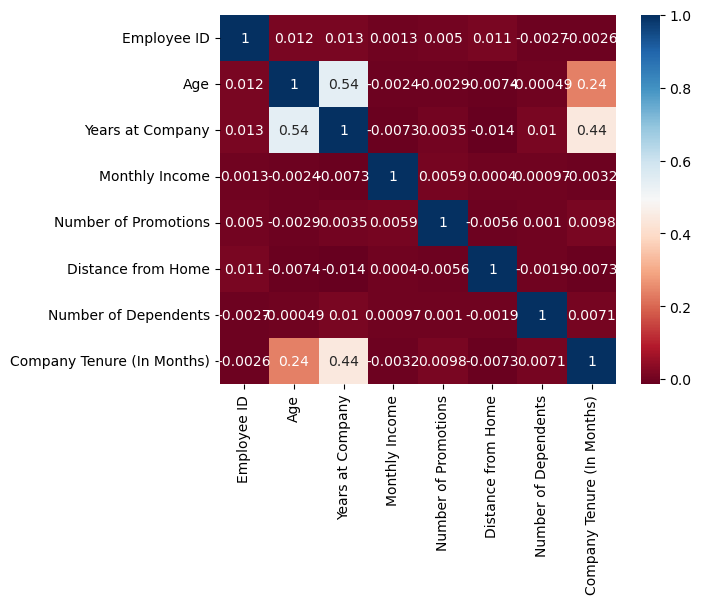

In [37]:
# Create correlation matrix for numerical columns
corr_matrix=X_train[num_cols].corr()
# Plot Heatmap of the correlation matrix
sns.heatmap(X_train[num_cols].corr(),cmap="RdBu",annot=True)
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

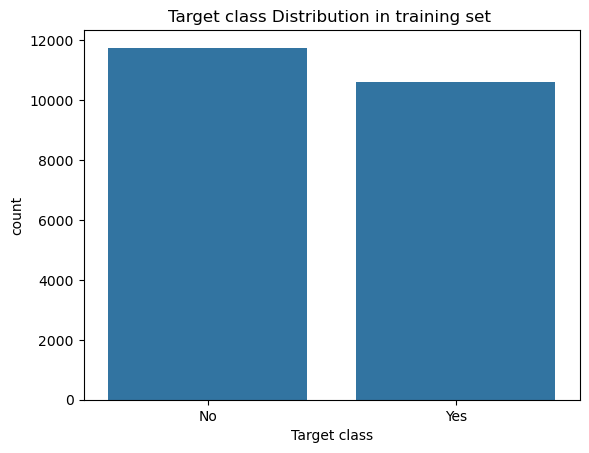

In [38]:
# Plot a bar chart to check class balance
sns.countplot(x=y_train)
plt.title("Target class Distribution in training set ")
plt.xlabel("Target class")
plt.ylabel("count")
plt.xticks([0,1],["No","Yes"])
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

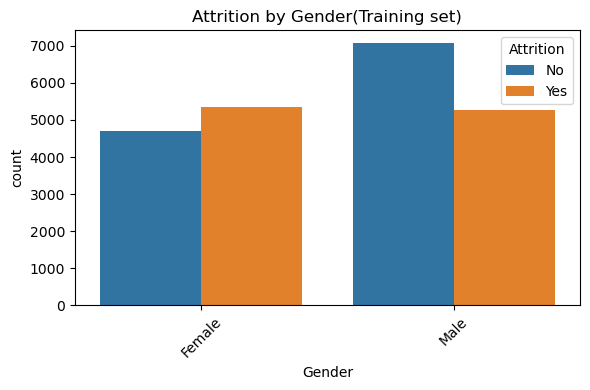

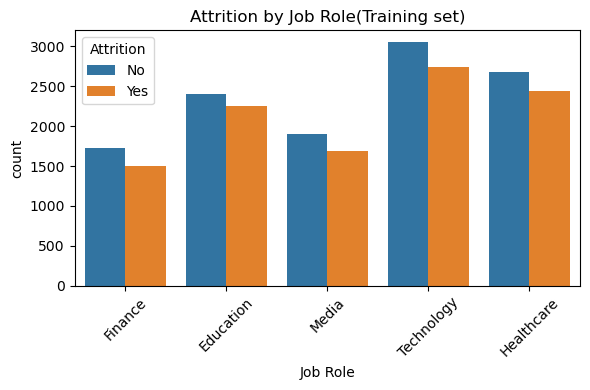

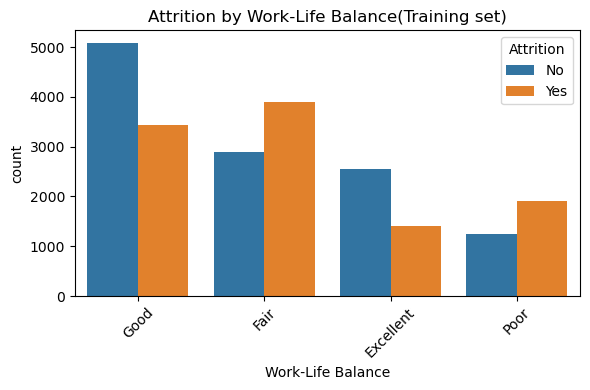

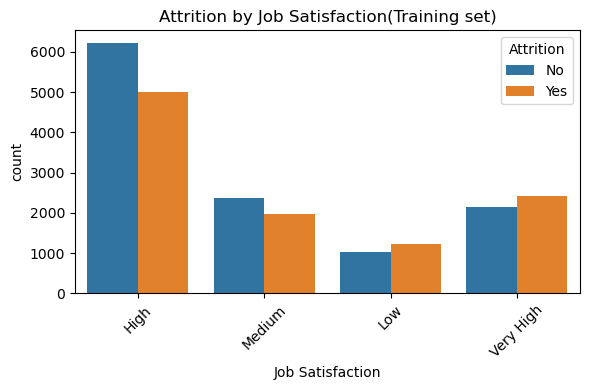

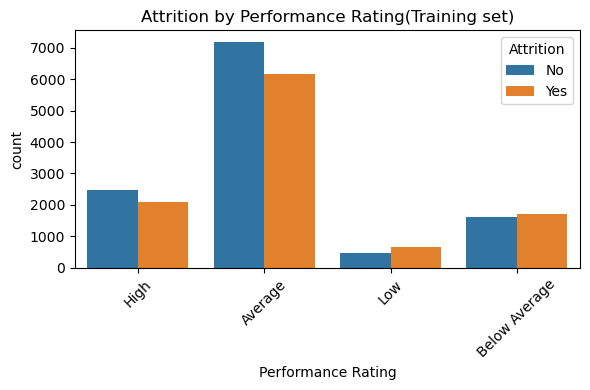

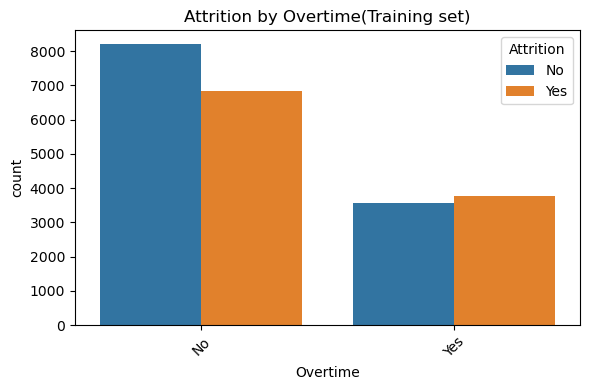

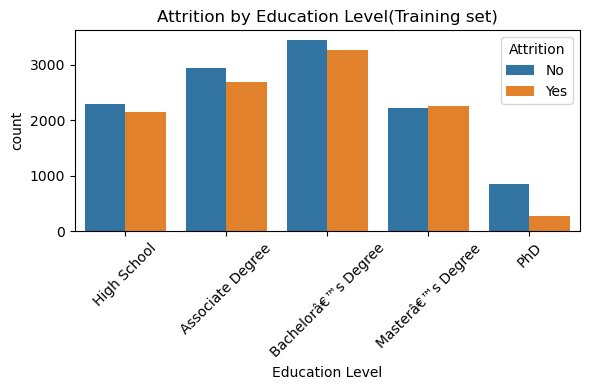

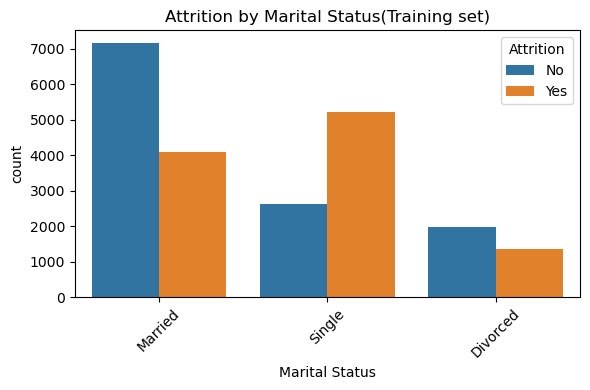

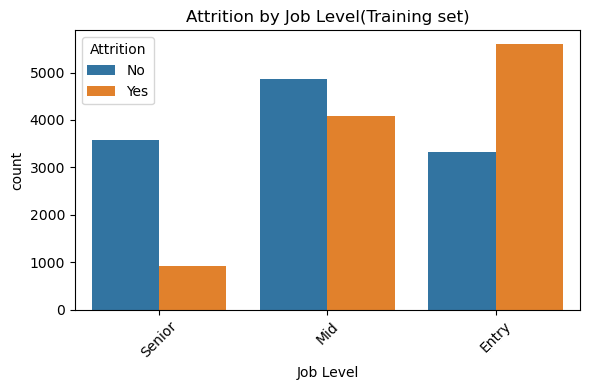

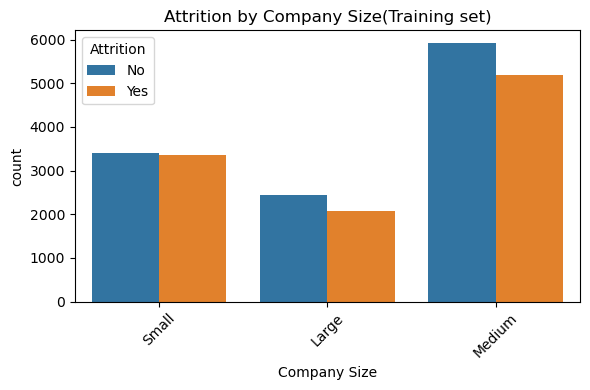

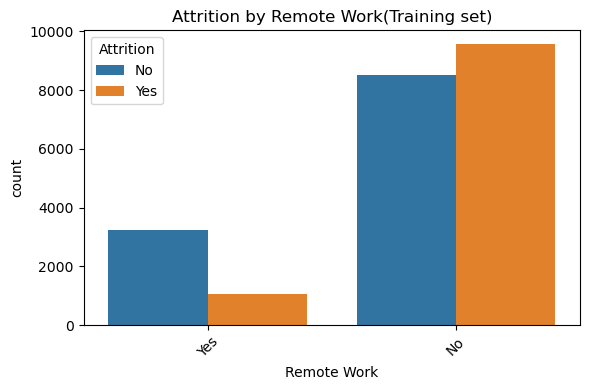

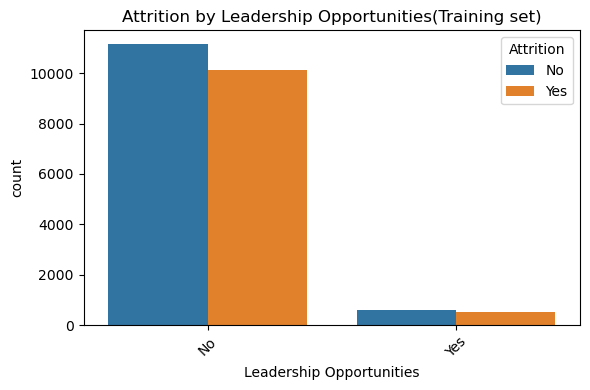

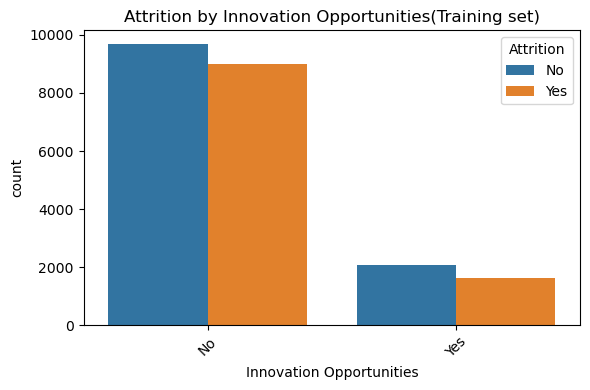

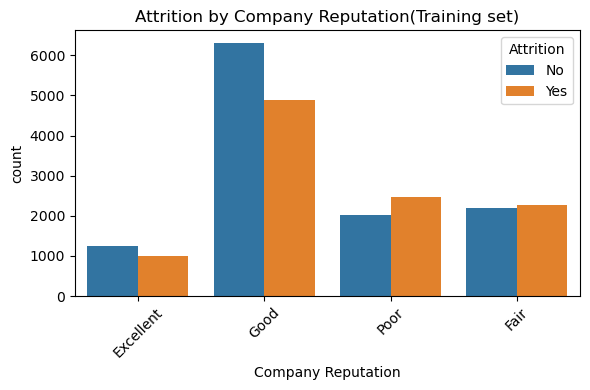

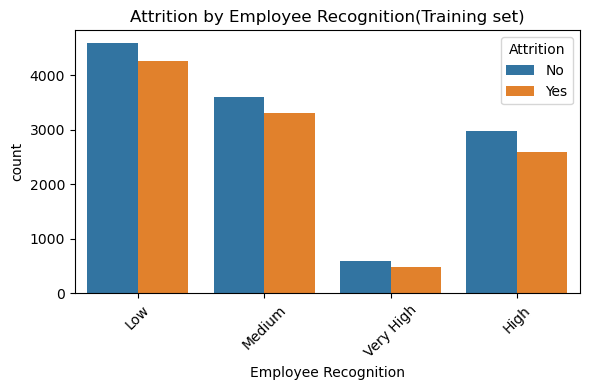

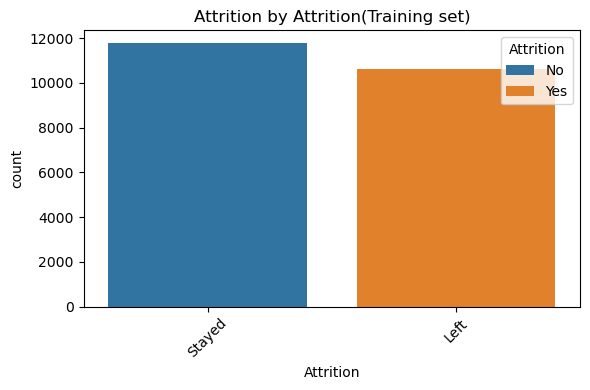

In [41]:
# Plot distribution for each categorical column with target variable
cat_cols=df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    temp_data=X_train.copy()
    temp_data["Attrition"]=y_train
    sns.countplot(data=temp_data,x=col,hue=y_train)
    plt.title(f'Attrition by {col}(Training set)')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.legend(title='Attrition',labels=["No","Yes"])
    plt.tight_layout()
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [42]:
# Select numerical columns
num_cols=X_test.select_dtypes(include=["int64","float64"]).columns
num_cols

Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

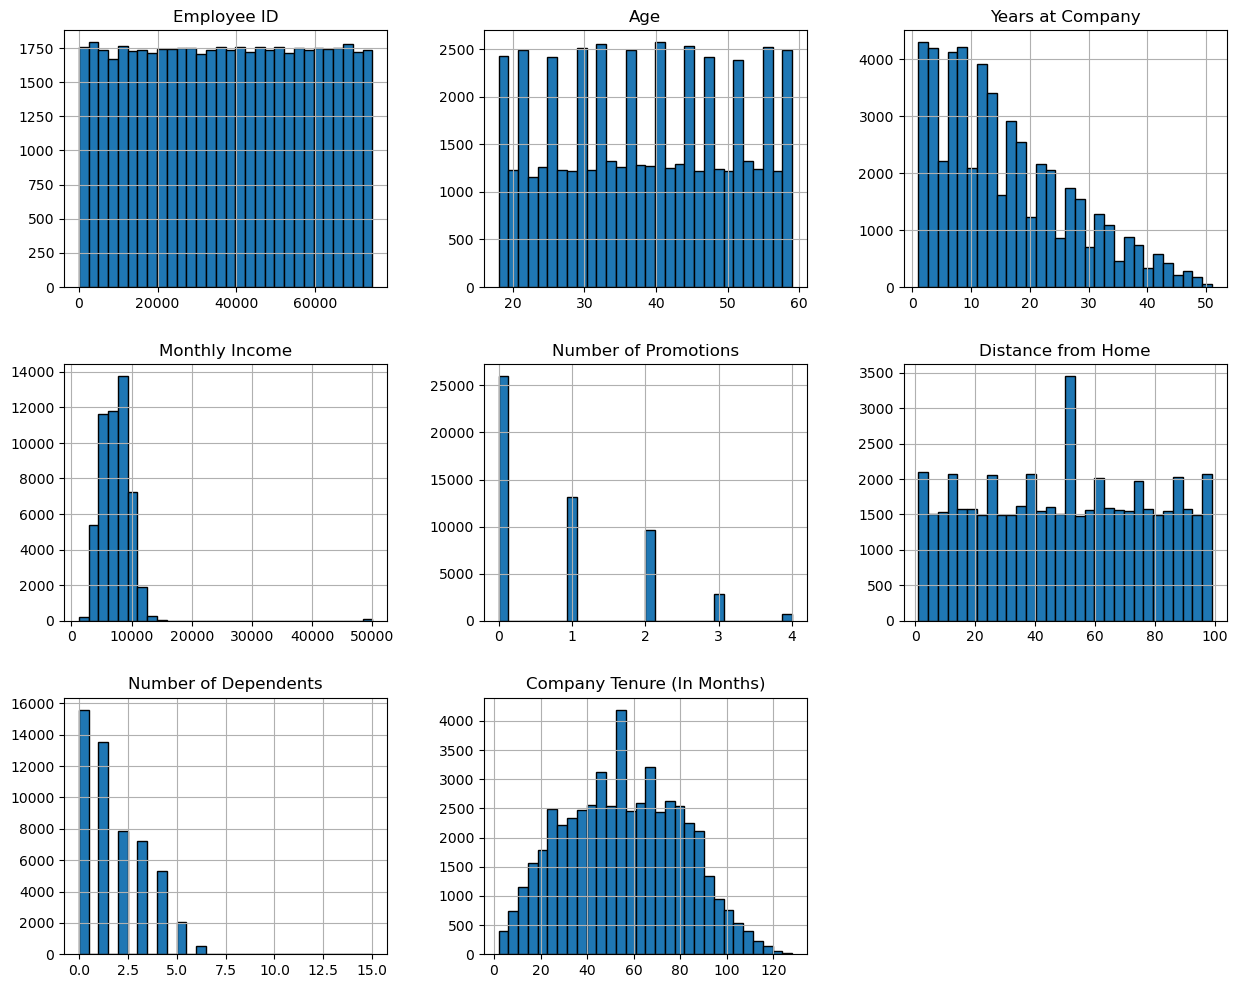

In [48]:
# Plot all the numerical columns to understand their distribution
num_cols=X_test.select_dtypes(include=["int64","float64"])
num_cols.hist(figsize=(15,12),bins=30,edgecolor="black")
plt.title(f'Distribution of {col} in validation data')
plt.xlabel(col)
plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

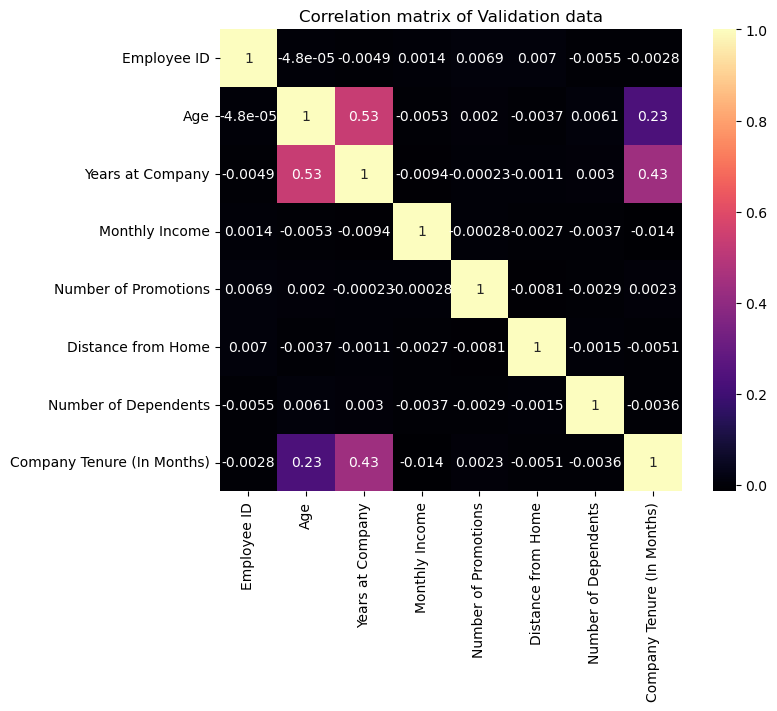

In [52]:
# Create correlation matrix for numerical columns
corr_matrix= X_test.select_dtypes(include=["int64","float64"]).corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,cmap="magma",annot=True,square=True)
plt.title("Correlation matrix of Validation data")
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

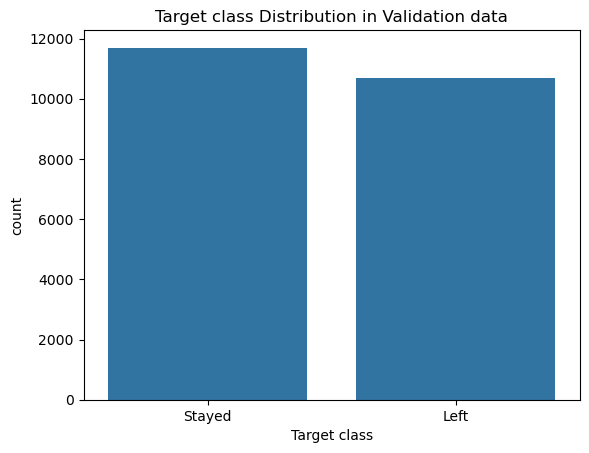

Attrition
Stayed    52.253943
Left      47.746057
Name: proportion, dtype: float64


In [266]:
# Plot a bar chart to check class balance
sns.countplot(x=y_test)
plt.title("Target class Distribution in Validation data")
plt.xlabel("Target class")
plt.ylabel("count")
plt.show()
print(y_test.value_counts(normalize=True) * 100)

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

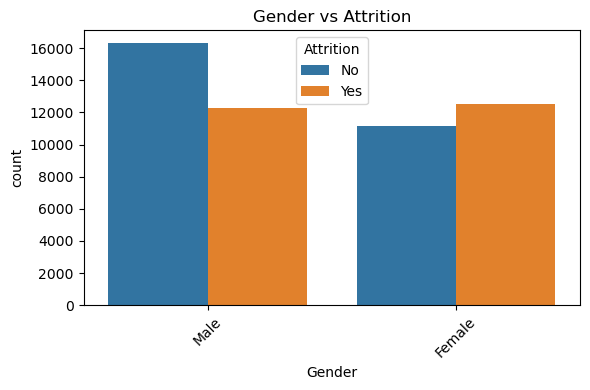

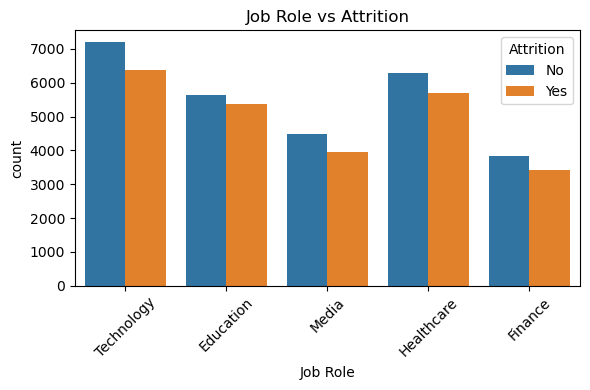

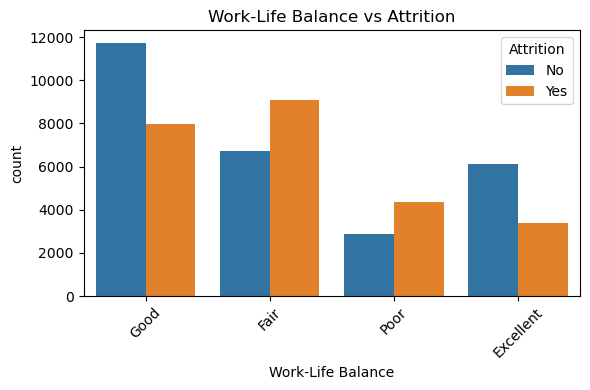

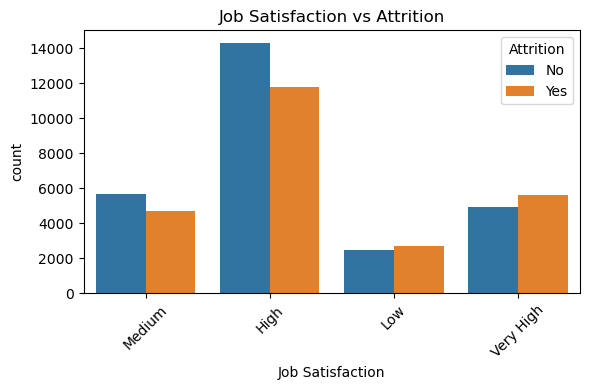

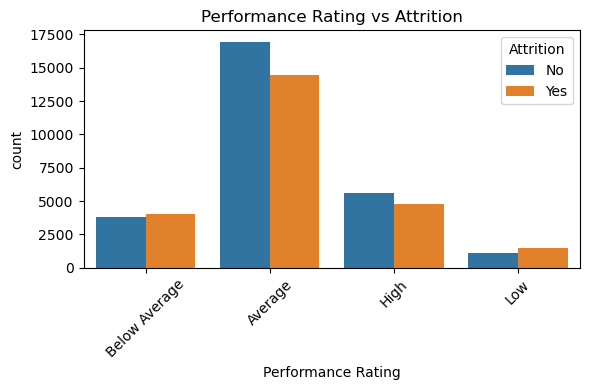

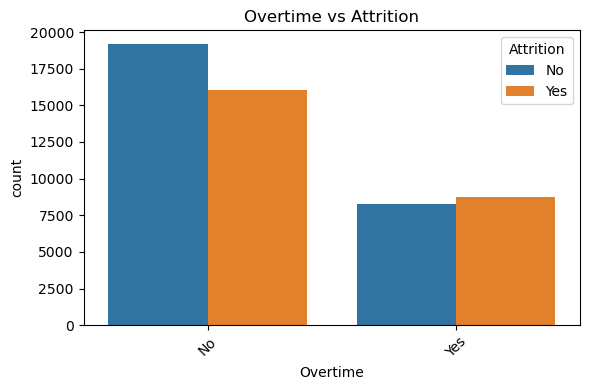

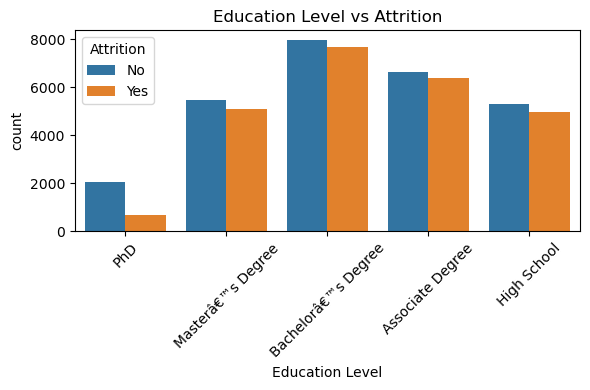

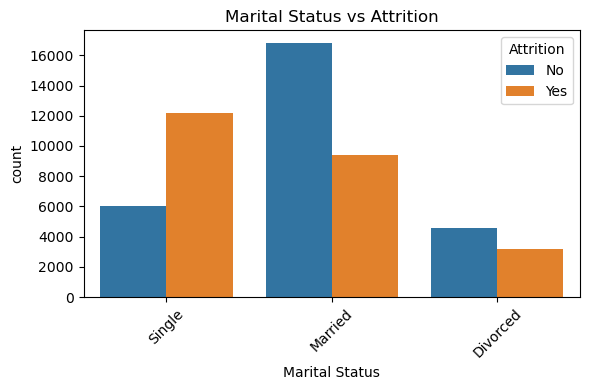

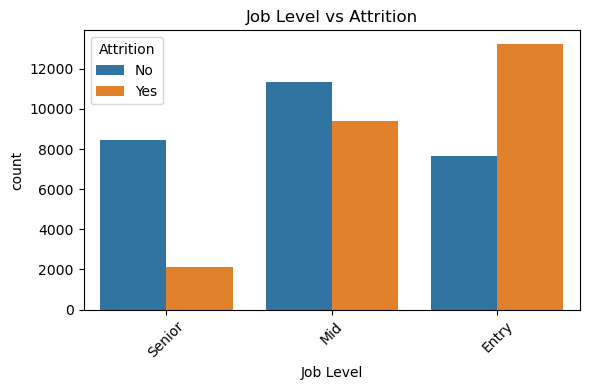

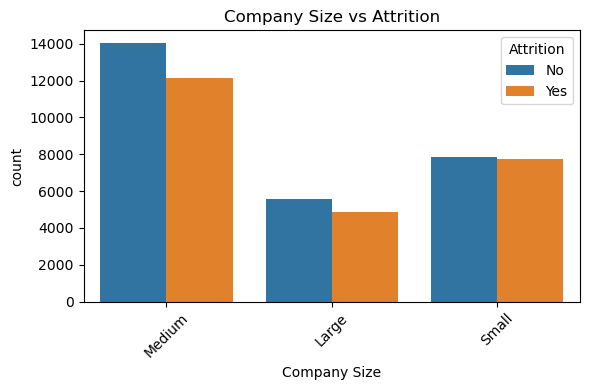

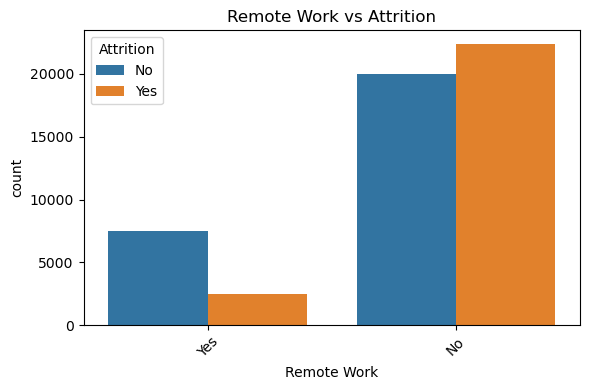

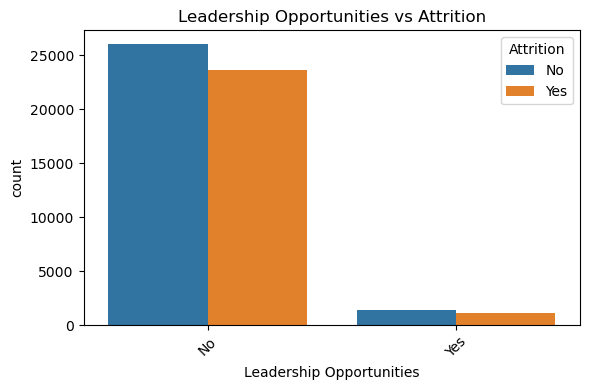

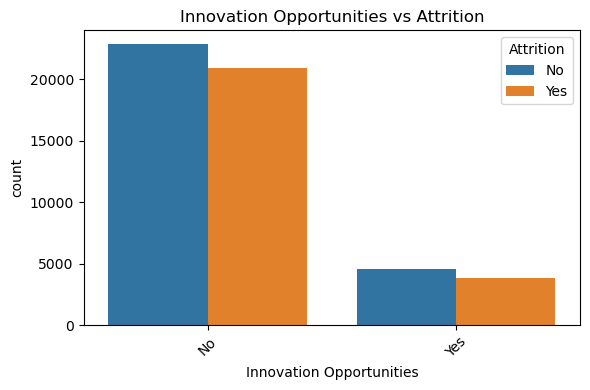

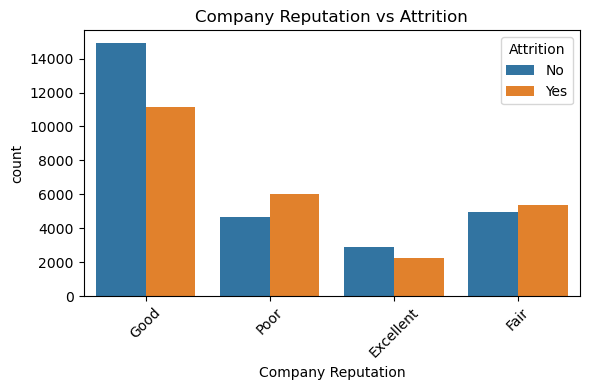

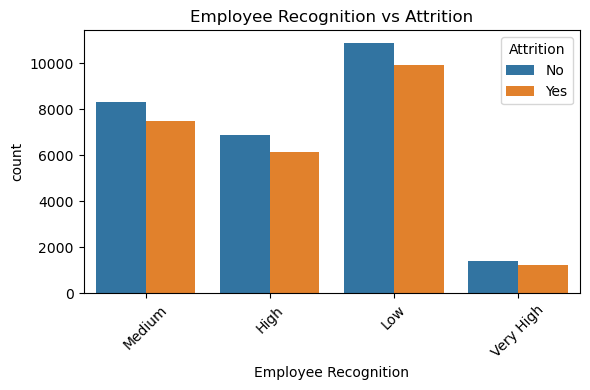

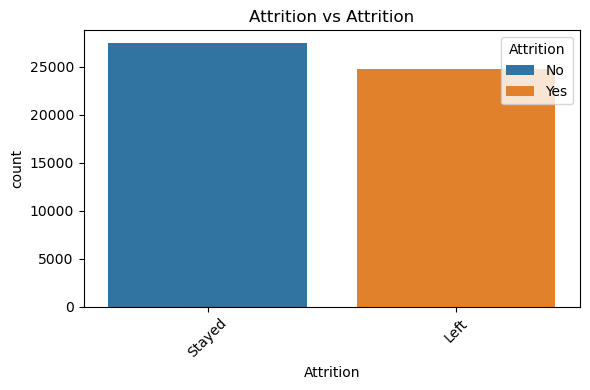

In [55]:
# Plot distribution for each categorical column with target variable
cat_cols=df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    val_data=X_test.copy()
    val_data["Attrition"]=y_test
    sns.countplot(data=val_data,x=col,hue='Attrition')
    plt.title(f'{col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.legend(title='Attrition',labels=["No","Yes"])
    plt.tight_layout()
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [56]:
# Check the categorical columns
cat_cols=X_train.select_dtypes(include=["object","category"]).columns
multi_cat_cols=[col for col in cat_cols if X_train[col].nunique()>2]
cat_cols

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [57]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies=pd.get_dummies(X_train[multi_cat_cols],drop_first=True)
# Add the results to the master DataFrame
X_train=pd.concat([X_train,X_train_dummies],axis=1)

Now, drop the original categorical columns and check the DataFrame

In [58]:
# Drop the original categorical columns and check the DataFrame
X_train.drop(columns=multi_cat_cols,inplace=True)
X_train.head()

Employee ID  Age  Gender  Years at Company  Monthly Income  \
56539        53555   26  Female                14            6495   
25429        20421   30    Male                 8            5229   
18859        32715   39  Female                29            6101   
36473        46539   48    Male                11            6123   
52659        23933   28    Male                15            8710   

       Number of Promotions Overtime  Distance from Home  \
56539                     1       No                33.0   
25429                     2      Yes                99.0   
18859                     0       No                32.0   
36473                     1       No                10.0   
52659                     0       No                65.0   

       Number of Dependents  Company Tenure (In Months)  ... Job Level_Mid  \
56539                     0                        88.0  ...         False   
25429                     1                        61.0  ...          True   
18859                     0                        35.0  ...         False   
36473                     0                        42.0  ...         False   
52659                     6                        64.0  ...          True   

      Job Level_Senior Company Size_Medium  Company Size_Small  \
56539             True               False                True   
25429            False               False               False   
18859            False                True               False   
36473            False                True               False   
52659            False                True               False   

       Company Reputation_Fair  Company Reputation_Good  \
56539                    False                    False   
25429                    False                     True   
18859                    False                    False   
36473                    False                    False   
52659                    False                     True   

       Company Reputation_Poor  Employee Recognition_Low  \
56539                    False                      True   
25429                    False                      True   
18859                    False                     False   
36473                    False                     False   
52659                    False                      True   

       Employee Recognition_Medium  Employee Recognition_Very High  
56539                        False                           False  
25429                        False                           False  
18859                         True                           False  
36473                        False                            True  
52659                        False                           False  

[5 rows x 42 columns]

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [59]:
# Create dummy variables using the 'get_dummies' for independent columns
X_test_dummies=pd.get_dummies(X_test[multi_cat_cols],drop_first=True)
# Add the results to the master DataFrame
X_test=pd.concat([X_test,X_test_dummies],axis=1)

Now, drop the original categorical columns and check the DataFrame

In [60]:
# Drop categorical columns and check the DataFrame
X_test.drop(columns=multi_cat_cols,inplace=True)
X_test.head()

Employee ID  Age  Gender  Years at Company  Monthly Income  \
61539        56957   58    Male                43           10970   
42583        26041   18  Female                 6            9242   
55936         4435   49    Male                15            5171   
66035        38945   46  Female                18            8151   
23119        69132   43    Male                22            8304   

       Number of Promotions Overtime  Distance from Home  \
61539                     0       No                53.0   
42583                     0      Yes                31.0   
55936                     0       No                55.0   
66035                     2       No                42.0   
23119                     1       No                50.0   

       Number of Dependents  Company Tenure (In Months)  ... Job Level_Mid  \
61539                     0                        57.0  ...         False   
42583                     3                        63.0  ...          True   
55936                     3                        47.0  ...         False   
66035                     0                        30.0  ...          True   
23119                     2                        76.0  ...         False   

      Job Level_Senior Company Size_Medium  Company Size_Small  \
61539             True                True               False   
42583            False               False               False   
55936            False                True               False   
66035            False               False               False   
23119            False                True               False   

       Company Reputation_Fair  Company Reputation_Good  \
61539                    False                     True   
42583                    False                     True   
55936                    False                     True   
66035                    False                     True   
23119                    False                    False   

       Company Reputation_Poor  Employee Recognition_Low  \
61539                    False                     False   
42583                    False                     False   
55936                    False                     False   
66035                    False                     False   
23119                     True                     False   

       Employee Recognition_Medium  Employee Recognition_Very High  
61539                         True                           False  
42583                        False                           False  
55936                         True                           False  
66035                         True                           False  
23119                         True                           False  

[5 rows x 42 columns]

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [61]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train=pd.DataFrame(y_train,columns=["Attrition"])
y_test=pd.DataFrame(y_test,columns=["Attrition"])

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [62]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dummies=pd.get_dummies(y_train["Attrition"],drop_first=True)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [63]:
# Create dummy variables using the 'get_dummies' for dependent column
y_test_dummies=pd.get_dummies(y_test["Attrition"],drop_first=True)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [65]:
# Drop redundant columns from both train and validation
reduntant_cols=[col for col in X_train.columns if X_train[col].nunique()<=1]
X_train.drop(columns=reduntant_cols,inplace=True)
X_test.drop(columns=reduntant_cols,inplace=True)

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [66]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [218]:
# Scale the numeric features present in the training set
numeric_cols=X_train.select_dtypes(include=["int64","float64"]).columns.tolist()
scaler=MinMaxScaler()
X_train_scaled=X_train.copy()
X_train_scaled[numeric_cols]=scaler.fit_transform(X_train[numeric_cols])
X_train_scaled.head()
# Scale the numerical features present in the validation set
X_test_scaled=X_test.copy()
X_test_scaled[numeric_cols]=scaler.transform(X_test[numeric_cols])
X_test_scaled.head()


Employee ID       Age  Gender  Years at Company    Job Role  \
61539     0.764541  0.975610    Male              0.84  Technology   
42583     0.349544  0.000000  Female              0.10  Technology   
55936     0.059519  0.756098    Male              0.28   Education   
66035     0.522759  0.682927  Female              0.34  Technology   
23119     0.927970  0.609756    Male              0.42  Technology   

       Monthly Income Work-Life Balance Job Satisfaction Performance Rating  \
61539        0.199656              Good           Medium      Below Average   
42583        0.164249              Good             High            Average   
55936        0.080834              Good              Low               High   
66035        0.141894              Fair        Very High            Average   
23119        0.145029              Fair             High            Average   

       Number of Promotions  ... Marital Status  Number of Dependents  \
61539                  0.00  ...         Single              0.000000   
42583                  0.00  ...        Married              0.200000   
55936                  0.00  ...         Single              0.200000   
66035                  0.50  ...        Married              0.000000   
23119                  0.25  ...         Single              0.133333   

      Job Level Company Size  Company Tenure (In Months) Remote Work  \
61539    Senior       Medium                    0.436508         Yes   
42583       Mid        Large                    0.484127          No   
55936     Entry       Medium                    0.357143          No   
66035       Mid        Large                    0.222222          No   
23119     Entry       Medium                    0.587302          No   

      Leadership Opportunities  Innovation Opportunities Company Reputation  \
61539                       No                        No               Good   
42583                       No                        No               Good   
55936                       No                        No               Good   
66035                       No                        No               Good   
23119                       No                        No               Poor   

      Employee Recognition  
61539               Medium  
42583                 High  
55936               Medium  
66035               Medium  
23119               Medium  

[5 rows x 23 columns]

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [79]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,LabelEncoder

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [219]:
# Import RFE and select 15 variables
X_train_encoded=pd.get_dummies(X_train,drop_first=True)
scaler=StandardScaler()
df_train_scaled=scaler.fit_transform(X_train_encoded)
le=LabelEncoder()
y_train_encoded=le.fit_transform(y_train)
rfe=RFE(lr,n_features_to_select=15)
rfe.fit(df_train_scaled,y_train_encoded)
rfe.support_

array([False, False,  True, False,  True,  True,  True, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
        True, False,  True, False, False, False])

In [220]:
# Display the features selected by RFE
selected_features=X_train_encoded.columns[rfe.support_]
print(selected_features)

Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Overtime_Yes', 'Education Level_PhD',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [85]:
# Put columns selected by RFE into variable 'col'
col=X_train_encoded.columns[rfe.support_]
print("Selected columns:",col)

Selected columns: Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Education Level_PhD',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Company Reputation_Fair', 'Company Reputation_Poor', 'Gender_Male',
       'Overtime_Yes', 'Remote Work_Yes'],
      dtype='object')


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [221]:
# Select only the columns selected by RFE
X_train_rfe=X_train_encoded[col]

In [222]:
# View the training data
X_train_rfe.head()

Years at Company  Number of Promotions  Distance from Home  \
60704                23                     0                40.0   
16163                 3                     1                93.0   
25709                20                     0                21.0   
4354                  7                     0                96.0   
49862                26                     1                28.0   

       Number of Dependents  Work-Life Balance_Fair  Work-Life Balance_Poor  \
60704                     2                    True                   False   
16163                     2                   False                    True   
25709                     2                   False                   False   
4354                      1                   False                   False   
49862                     0                    True                   False   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
60704                False                   True          False   
16163                False                   True           True   
25709                False                  False           True   
4354                 False                  False          False   
49862                False                  False          False   

       Job Level_Senior  Company Reputation_Fair  Company Reputation_Poor  \
60704             False                     True                    False   
16163             False                    False                     True   
25709             False                    False                    False   
4354              False                    False                    False   
49862             False                    False                    False   

       Gender_Male  Overtime_Yes  Remote Work_Yes  
60704        False         False            False  
16163         True          True            False  
25709        False          True            False  
4354         False         False            False  
49862         True          True            False

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [223]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train_rfe)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [267]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
model = LogisticRegression(class_weight='balanced', random_state=100)
y_train_encoded=pd.to_numeric(y_train_encoded)
logit_model=sm.Logit(y_train_encoded,X_train_sm.astype(float)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.493603
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                52227
Model:                          Logit   Df Residuals:                    52211
Method:                           MLE   Df Model:                           15
Date:                Mon, 26 May 2025   Pseudo R-squ.:                  0.2864
Time:                        20:33:48   Log-Likelihood:                -25779.
converged:                       True   LL-Null:                       -36128.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2351      0.039     -6.035      0.000      -0.312   

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [104]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [225]:
# Make a VIF DataFrame for all the variables present
X_train_sm= X_train_sm.apply(lambda col: col.astype(int) if col.dtype == "bool" else col)
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i)
                 for i in range(len(X_train_sm.columns))]
vif_data

Feature        VIF
0                     const  13.517731
1          Years at Company   1.000266
2      Number of Promotions   1.000224
3        Distance from Home   1.000400
4      Number of Dependents   1.000207
5    Work-Life Balance_Fair   1.075188
6    Work-Life Balance_Poor   1.075526
7       Education Level_PhD   1.000353
8     Marital Status_Single   1.000330
9             Job Level_Mid   1.202336
10         Job Level_Senior   1.202466
11  Company Reputation_Fair   1.066916
12  Company Reputation_Poor   1.066921
13              Gender_Male   1.000315
14             Overtime_Yes   1.000492
15          Remote Work_Yes   1.000199

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [226]:
# Predict the probabilities on the training set
y_train_pred_prob=logit_model.predict(X_train_sm)
print(y_train_pred_prob)

60704    0.036385
16163    0.044673
25709    0.693836
4354     0.296530
49862    0.339792
           ...   
14260    0.748113
63370    0.670589
65615    0.502542
56088    0.861310
38408    0.983139
Length: 52227, dtype: float64


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [227]:
# Reshape it into an array
y_train_array=np.array(y_train_pred_prob).reshape(-1,1)
y_train_array[:5]

array([[0.0363855 ],
       [0.04467329],
       [0.69383642],
       [0.29652982],
       [0.33979166]])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [228]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
pred_df=pd.DataFrame({
    'Actual_Stayed_Flag':y_train_encoded,
    'Predicted Probabilities':y_train_pred_prob
})
pred_df.head()

Actual_Stayed_Flag  Predicted Probabilities
60704                   0                 0.036385
16163                   0                 0.044673
25709                   1                 0.693836
4354                    0                 0.296530
49862                   0                 0.339792

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [229]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
pred_df["Predicted"]=(pred_df["Predicted Probabilities"]>0.5).astype(int)
print(pred_df)

       Actual_Stayed_Flag  Predicted Probabilities  Predicted
60704                   0                 0.036385          0
16163                   0                 0.044673          0
25709                   1                 0.693836          1
4354                    0                 0.296530          0
49862                   0                 0.339792          0
...                   ...                      ...        ...
14260                   1                 0.748113          1
63370                   1                 0.670589          1
65615                   1                 0.502542          1
56088                   1                 0.861310          1
38408                   1                 0.983139          1

[52227 rows x 3 columns]


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [231]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy=metrics.accuracy_score(pred_df['Actual_Stayed_Flag'],pred_df['Predicted'])
print(f'Training accuracy:{accuracy:.4f}')

Training accuracy:0.7474


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

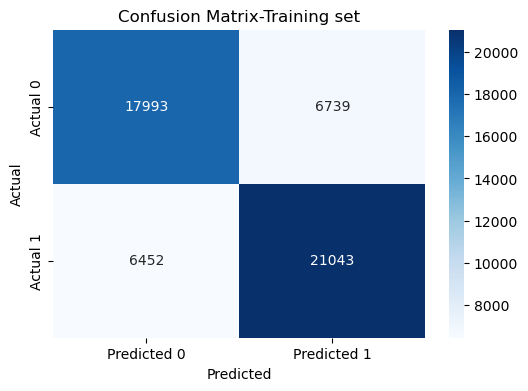

In [232]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred_df['Actual_Stayed_Flag'],pred_df['Predicted'])
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=["Predicted 0","Predicted 1"],
            yticklabels=["Actual 0","Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix-Training set")
plt.show()

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [233]:
# Create variables for true positive, true negative, false positive and false negative
cm=confusion_matrix(pred_df['Actual_Stayed_Flag'],pred_df['Predicted'])
TN,FP,FN,TP=cm.ravel()
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

True Negative (TN): 17993
False Positive (FP): 6739
False Negative (FN): 6452
True Positive (TP): 21043


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [234]:
# Calculate sensitivity
sensitivity=TP/(TP+FN)
print(f"Sensitivity:{sensitivity:.4f}")

Sensitivity:0.7653


In [235]:
# Calculate specificity
specificity=TN/(TN+FP)
print(f"Specificity:{specificity:.4f}")

Specificity:0.7275


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [236]:
# Calculate precision
precision=TP/(TP+FP)
print(f"Precision: {precision:.4f}")

Precision: 0.7574


In [237]:
# Calculate recall
recall=TP/(TP+FN)
print(f"Recall: {recall:.4f}")

Recall: 0.7653


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [238]:
# Define ROC function
from sklearn.metrics import roc_curve,roc_auc_score,auc
def plot_roc(y_true,y_proba):
    fpr,tpr,_=roc_curve(y_true,y_proba)
    plt.plot(fpr,tpr,label=f'AUC={auc(fpr,tpr):.4f}')
    plt.plot([0,1],[0,1],"r--")
    plt.xlabel("FPR");plt.ylabel("TPR");plt.title("ROC Curve")
    plt.legend()
    plt.show()
    

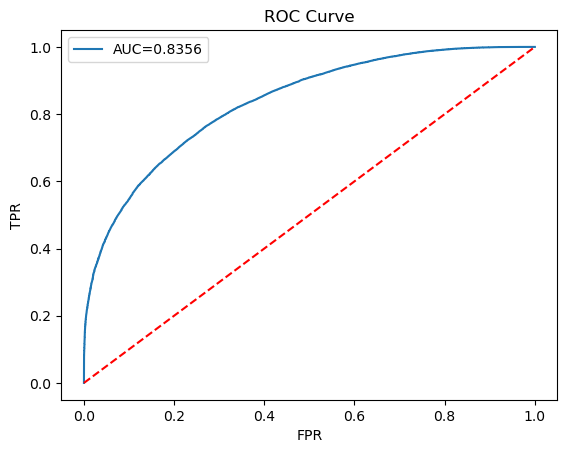

In [239]:
# Call the ROC function
plot_roc(pred_df["Actual_Stayed_Flag"],pred_df["Predicted Probabilities"])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [141]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
cutoffs=[0.3,0.4,0.5,0.6,0.7]
for cutoff in cutoffs:
    pred_df[f'Predicted_{cutoff}']=(pred_df['Predicted Probabilities']>cutoff).astype(int)

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [240]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_values=np.arange(0.1,0.91,0.05)
metrics_list=[]
y_true=pred_df["Actual_Stayed_Flag"]
y_scores=pred_df["Predicted Probabilities"]

for cutoff in cutoff_values:
    y_pred=(y_scores>=cutoff).astype(int)
    TN,FP,FN,TP=confusion_matrix(y_true,y_pred,labels=[0,1]).ravel()

    #Compute metrics
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    sensitivity=TP/(TP+FN) if (TP+FN)>0 else 0
    specificity=TN/(TN+FP)if (TN+FP)>0 else 0
    
    #append
    metrics_list.append({
        'Cutoff': cutoff,
        'Accuracy': round(accuracy, 4),
        'Sensitivity': round(sensitivity, 4),
        'Specificity': round(specificity, 4)
    })

#create DataFrame
cutoff_df=pd.DataFrame(metrics_list,columns=["Cutoff","Accuracy","Sensitivity","Specificity"])
print(cutoff_df)

    Cutoff  Accuracy  Sensitivity  Specificity
0     0.10    0.6031       0.9954       0.1671
1     0.15    0.6426       0.9823       0.2648
2     0.20    0.6731       0.9620       0.3519
3     0.25    0.6969       0.9371       0.4299
4     0.30    0.7147       0.9101       0.4974
5     0.35    0.7289       0.8768       0.5645
6     0.40    0.7378       0.8414       0.6226
7     0.45    0.7455       0.8066       0.6775
8     0.50    0.7474       0.7653       0.7275
9     0.55    0.7449       0.7198       0.7727
10    0.60    0.7394       0.6707       0.8158
11    0.65    0.7312       0.6173       0.8578
12    0.70    0.7179       0.5599       0.8935
13    0.75    0.6991       0.4941       0.9271
14    0.80    0.6723       0.4183       0.9548
15    0.85    0.6387       0.3347       0.9767
16    0.90    0.5946       0.2381       0.9910


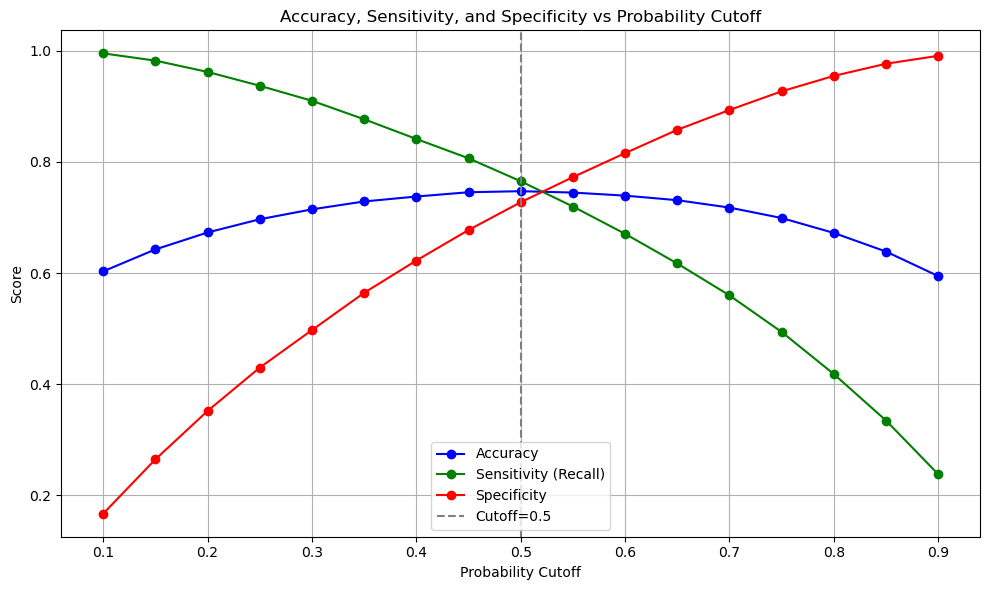

In [241]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
plt.figure(figsize=(10,6))
plt.plot(cutoff_df["Cutoff"],cutoff_df["Accuracy"],label="Accuracy",marker="o",color="blue")
plt.plot(cutoff_df["Cutoff"],cutoff_df["Sensitivity"],label="Sensitivity (Recall)",marker="o",color="green")
plt.plot(cutoff_df["Cutoff"],cutoff_df["Specificity"],label="Specificity",marker="o",color="red")
plt.axvline(x=0.5,color="grey",linestyle="--",label='Cutoff=0.5')
plt.title('Accuracy, Sensitivity, and Specificity vs Probability Cutoff')
plt.xlabel("Probability Cutoff")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [242]:
# Create a column for final prediction based on the optimal cutoff
optimal_cutoff=0.45
pred_df["Final_Prediction"]=(pred_df["Predicted Probabilities"]>optimal_cutoff).astype(int)
pred_df[["Actual_Stayed_Flag","Predicted Probabilities","Final_Prediction"]].head()

Actual_Stayed_Flag  Predicted Probabilities  Final_Prediction
60704                   0                 0.036385                 0
16163                   0                 0.044673                 0
25709                   1                 0.693836                 1
4354                    0                 0.296530                 0
49862                   0                 0.339792                 0

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [243]:
# Calculate the accuracy
accuracy=metrics.accuracy_score(pred_df["Actual_Stayed_Flag"],pred_df["Final_Prediction"])
print(f'Accuracy:{accuracy:.4f}')


Accuracy:0.7455


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

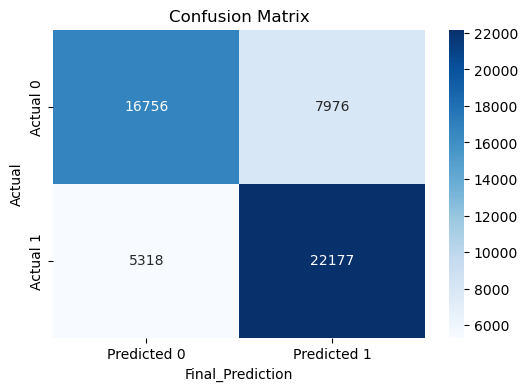

In [244]:
# Create the confusion matrix once again
cm=confusion_matrix(pred_df['Actual_Stayed_Flag'],pred_df['Final_Prediction'])
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=["Predicted 0","Predicted 1"],
            yticklabels=["Actual 0","Actual 1"])
plt.xlabel("Final_Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [245]:
# Create variables for true positive, true negative, false positive and false negative
cm=confusion_matrix(pred_df['Actual_Stayed_Flag'],pred_df['Final_Prediction'])
TN,FP,FN,TP=cm.ravel()
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

True Negative (TN): 16756
False Positive (FP): 7976
False Negative (FN): 5318
True Positive (TP): 22177


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [246]:
# Calculate Sensitivity
sensitivity=TP/(TP+FN)
print(f"Sensitivity:{sensitivity:.4f}")

Sensitivity:0.8066


In [247]:
# Calculate Specificity
specificity=TN/(TN+FP)
print(f"Specificity:{specificity:.4f}")

Specificity:0.6775


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [248]:
# Calculate Precision
precision=TP/(TP+FP)
print(f"Precision: {precision:.4f}")

Precision: 0.7355


In [249]:
# Calculate Recall
recall=TP/(TP+FN)
print(f"Recall: {recall:.4f}")

Recall: 0.8066


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [164]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [250]:
# Check actual and predicted values from initial model
pred_df[["Actual_Stayed_Flag","Predicted Probabilities","Final_Prediction"]].head()

Actual_Stayed_Flag  Predicted Probabilities  Final_Prediction
60704                   0                 0.036385                 0
16163                   0                 0.044673                 0
25709                   1                 0.693836                 1
4354                    0                 0.296530                 0
49862                   0                 0.339792                 0

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

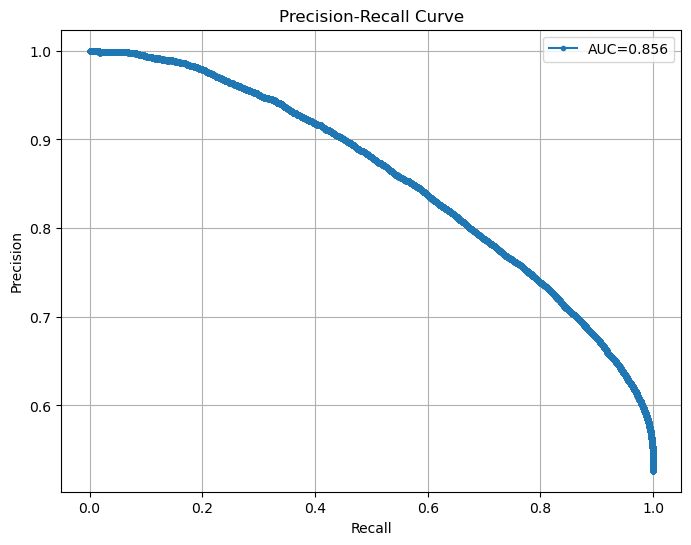

In [251]:
# Plot precision-recall curve
y_true=pred_df["Actual_Stayed_Flag"]
y_scores=pred_df["Predicted Probabilities"]
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
auc_precision_recall = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker=".", label=f'AUC={auc_precision_recall:.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [252]:
# Select the relevant features for validation set
X_test_encoded=pd.get_dummies(X_test)
X_test_encoded=X_test_encoded.reindex(columns=selected_features,fill_value=0)
X_test_selected=X_test_encoded
X_test_selected.head()

Years at Company  Number of Promotions  Distance from Home  \
61539                43                     0                53.0   
42583                 6                     0                31.0   
55936                15                     0                55.0   
66035                18                     2                42.0   
23119                22                     1                50.0   

       Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
61539                     0         True                   False   
42583                     3        False                   False   
55936                     3         True                   False   
66035                     0        False                    True   
23119                     2         True                    True   

       Work-Life Balance_Poor  Overtime_Yes  Education Level_PhD  \
61539                   False         False                 True   
42583                   False          True                False   
55936                   False         False                False   
66035                   False         False                False   
23119                   False         False                False   

       Marital Status_Single  Job Level_Mid  Job Level_Senior  \
61539                   True          False              True   
42583                  False           True             False   
55936                   True          False             False   
66035                  False           True             False   
23119                   True          False             False   

       Remote Work_Yes  Company Reputation_Fair  Company Reputation_Poor  
61539             True                    False                    False  
42583            False                    False                    False  
55936            False                    False                    False  
66035            False                    False                    False  
23119            False                    False                     True

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [253]:
# Add constant to X_validation
X_val=sm.add_constant(X_test_selected,has_constant="add")
X_val.head()

const  Years at Company  Number of Promotions  Distance from Home  \
61539    1.0                43                     0                53.0   
42583    1.0                 6                     0                31.0   
55936    1.0                15                     0                55.0   
66035    1.0                18                     2                42.0   
23119    1.0                22                     1                50.0   

       Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
61539                     0         True                   False   
42583                     3        False                   False   
55936                     3         True                   False   
66035                     0        False                    True   
23119                     2         True                    True   

       Work-Life Balance_Poor  Overtime_Yes  Education Level_PhD  \
61539                   False         False                 True   
42583                   False          True                False   
55936                   False         False                False   
66035                   False         False                False   
23119                   False         False                False   

       Marital Status_Single  Job Level_Mid  Job Level_Senior  \
61539                   True          False              True   
42583                  False           True             False   
55936                   True          False             False   
66035                  False           True             False   
23119                   True          False             False   

       Remote Work_Yes  Company Reputation_Fair  Company Reputation_Poor  
61539             True                    False                    False  
42583            False                    False                    False  
55936            False                    False                    False  
66035            False                    False                    False  
23119            False                    False                     True

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [254]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
X_val = X_val.astype(float)
assert X_val.notnull().all().all(), "There are nulls in the features!"
assert np.isfinite(X_val).all().all(), "There are infinite values in the features!"

# Now predict
y_validation_pred= logit_model.predict(X_val)
y_validation_pred

61539    0.911919
42583    0.096813
55936    0.807396
66035    0.168766
23119    0.897986
           ...   
60911    0.064800
38306    0.088019
57813    0.685816
4886     0.028656
41608    0.814286
Length: 22383, dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [257]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability=pd.DataFrame({"Predicted Probability":y_validation_pred})
predicted_probability.reset_index(drop=True,inplace=True)
# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame({"Actual": y_test.values})
actual.reset_index(drop=True,inplace=True)
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
val_result=pd.concat([actual,predicted_probability],axis=1)

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [258]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
val_result=pd.concat([actual,predicted_probability],axis=1)
cutoff=0.45
val_result["final_prediction"]=(val_result["Predicted Probability"]>cutoff).astype(int)
# Check the DataFrame
print(val_result)

       Actual  Predicted Probability  final_prediction
0      Stayed               0.911919                 1
1      Stayed               0.096813                 0
2        Left               0.807396                 1
3        Left               0.168766                 0
4        Left               0.897986                 1
...       ...                    ...               ...
22378  Stayed               0.064800                 0
22379  Stayed               0.088019                 0
22380    Left               0.685816                 1
22381    Left               0.028656                 0
22382    Left               0.814286                 1

[22383 rows x 3 columns]


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [259]:
# Calculate the overall accuracy
print("Type of y_test:", type(y_test))
print("Shape of y_test:", getattr(y_test, 'shape', 'No shape attribute'))
print("First 5 rows of y_test:\n", y_test[:5])

Type of y_test: <class 'pandas.core.series.Series'>
Shape of y_test: (22383,)
First 5 rows of y_test:
 61539    Stayed
42583    Stayed
55936      Left
66035      Left
23119      Left
Name: Attrition, dtype: object


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

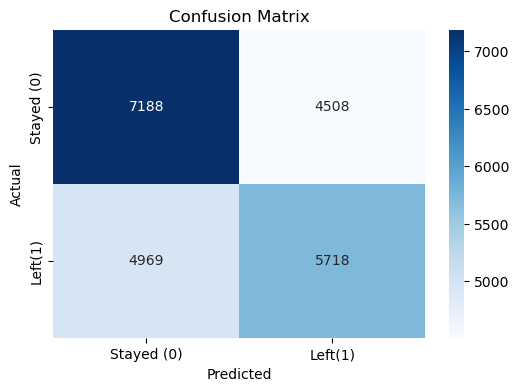

In [260]:
# Create confusion matrix
val_result["Actual_numeric"]=val_result["Actual"].map({"Stayed":0,"Left":1})
cm=confusion_matrix(val_result["Actual_numeric"],val_result["final_prediction"])
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=["Stayed (0)","Left(1)"],yticklabels=["Stayed (0)","Left(1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [261]:
# Create variables for true positive, true negative, false positive and false negative
TN,FP,FN,TP=cm.ravel()
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

True Negative (TN): 7188
False Positive (FP): 4508
False Negative (FN): 4969
True Positive (TP): 5718


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [262]:
# Calculate sensitivity
sensitivity=TP/(TP+FN)
print(f"Sensitivity:{sensitivity:.4f}")

Sensitivity:0.5350


In [263]:
# Calculate specificity
specificity=TN/(TN+FP)
print(f"Specificity:{specificity:.4f}")

Specificity:0.6146


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [264]:
# Calculate precision
precision=TP/(TP+FP)
print(f"Precision: {precision:.4f}")

Precision: 0.5592


In [265]:
# Calculate recall
recall=TP/(TP+FN)
print(f"Recall: {recall:.4f}")

Recall: 0.5350


## Conclusion
The model predicts employee attrition with moderate accuracy of(0.3151) and precision (0.2622), indicating it misses some cases of actual attrition. While there is room for improvement, this project successfully demonstrates the modeling process and evaluation techniques. Future work can focus on better features and algorithms to improve performance.
